In [3]:
import os
import cv2
import pandas as pd
import numpy as np
import tensorflow as tf

In [4]:
train = pd.read_csv(r"training.csv")     #images and their bounding box coordinates
train.head(5)

,image_name,x1,x2,y1,y2
0,JPEG_20160706_121146_1000145715002.png,115,495,143,325
1,JPEG_20161119_174038_1000690577600.png,23,457,61,409
2,147444927651111470309333776-Roadster-Men-Casua...,37,601,13,470
3,147772332675720161028_161611.png,27,602,162,385
4,1473315333651DeeplearnS11638.png,60,586,174,325


In [5]:
train = np.array(train)
coord = train[:,1:5]
print (coord)

[[115 495 143 325]
 [23 457 61 409]
 [37 601 13 470]
 ...
 [0 485 26 480]
 [254 375 31 449]
 [212 437 101 454]]


In [6]:
# A vector of filenames.
filenames = train[:, 0]
print(filenames)

# `x1,x2,y1,y2` are the label coordinates for the image bounding boxes in filenames[i].
x1 = train[:, 1]
print(x1)
x2 = train[:, 2]
print(x2)
y1 = train[:, 3]
print(y1)
y2 = train[:, 4]
print(y2)
print(type(x1))

['JPEG_20160706_121146_1000145715002.png'
 'JPEG_20161119_174038_1000690577600.png'
 '147444927651111470309333776-Roadster-Men-Casual-Shoes-3041470309333487-1.png'
 ... 'JPEG_20161209_144221_1000965510278.png'
 '1469616355586JPEG_20160625_121504_1000332225062.png'
 'JPEG_20160711_125046_1000355681348.png']
[115 23 37 ... 0 254 212]
[495 457 601 ... 485 375 437]
[143 61 13 ... 26 31 101]
[325 409 470 ... 480 449 454]
<class 'numpy.ndarray'>


In [7]:
# Reads an image from a file, decodes it into a dense tensor, and leaves it in a fixed shape.
def _parse_function(filename):
    decoded_image = cv2.imread(os.path.join("images" , filename))
    #No need to resize the image. All images are 640x480x3.
    return decoded_image

img_training_array = []
counter = 0
for img_name in filenames:
    decoded = _parse_function(img_name)
    counter = counter + 1
    if (counter%1000==0):
        print("{} images completed".format(counter))
    img_training_array.append(decoded)

1000 images completed
2000 images completed
3000 images completed
4000 images completed
5000 images completed
6000 images completed
7000 images completed
8000 images completed
9000 images completed
10000 images completed
11000 images completed
12000 images completed
13000 images completed
14000 images completed


In [8]:
img_array_final = np.array(img_training_array)

In [9]:
np.shape(img_array_final)

(14000, 480, 640, 3)

In [10]:
img_array_final

array([[[[144, 154, 141],
         [144, 154, 141],
         [144, 154, 141],
         ...,
         [150, 159, 149],
         [151, 160, 150],
         [151, 160, 150]],

        [[143, 153, 140],
         [144, 154, 141],
         [144, 154, 141],
         ...,
         [149, 158, 148],
         [149, 158, 148],
         [149, 158, 148]],

        [[142, 152, 139],
         [143, 153, 140],
         [143, 153, 140],
         ...,
         [149, 158, 148],
         [149, 158, 148],
         [149, 158, 148]],

        ...,

        [[148, 158, 142],
         [148, 158, 142],
         [148, 158, 142],
         ...,
         [154, 162, 151],
         [154, 162, 151],
         [155, 163, 152]],

        [[148, 158, 142],
         [147, 157, 141],
         [147, 157, 141],
         ...,
         [155, 163, 152],
         [155, 163, 152],
         [155, 163, 152]],

        [[148, 158, 142],
         [147, 157, 141],
         [147, 157, 141],
         ...,
         [155, 163, 152],
        

In [11]:
example_train_X = img_array_final[0:64]
example_train_Y = coord[0:64]

In [12]:
import matplotlib.pyplot as plt 
import matplotlib.patches as pch
%matplotlib inline 

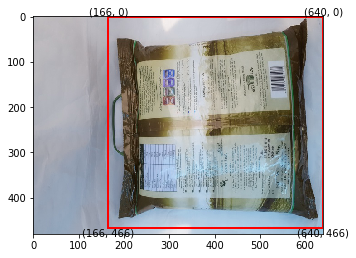

Bounding Box Coordinates x1:166 x2:640 y1:0 y2:466


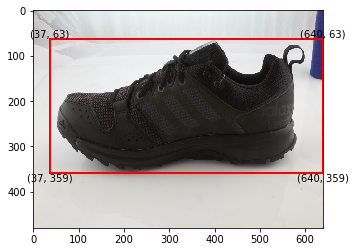

Bounding Box Coordinates x1:37 x2:640 y1:63 y2:359


In [13]:
for i in range(6900,6902):
    fig,ax = plt.subplots(1)
    ax.imshow(img_array_final[i])
    lower_left_point = (x1[i], y1[i])
    height_rect = y2[i] - y1[i]
    width_rect = x2[i]- x1[i]
    rect = pch.Rectangle(lower_left_point, width=width_rect, height=height_rect, 
                         linewidth=2,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
    ax.text(x1[i], y1[i], s = (x1[i], y1[i]), horizontalalignment='center', verticalalignment='bottom')
    ax.text(x2[i], y1[i], s = (x2[i], y1[i]), horizontalalignment='center', verticalalignment='bottom')
    ax.text(x1[i], y2[i], s = (x1[i], y2[i]), horizontalalignment='center', verticalalignment='top')
    ax.text(x2[i], y2[i], s = (x2[i], y2[i]), horizontalalignment='center', verticalalignment='top')
    plt.show()
    print("Bounding Box Coordinates x1:{} x2:{} y1:{} y2:{}".format(x1[i], x2[i], y1[i], y2[i]))

## Making the validation set

In [14]:
a = np.array(img_array_final[6900:6948])
b = np.array(img_array_final[4800:4848])
c = np.array(img_array_final[12000:12016])

validation_set_images = np.concatenate((a, b, c))

In [15]:
d = np.array(coord[6900:6948])
e = np.array(coord[4800:4848])
f = np.array(coord[12000:12016])

validation_set_coord = np.concatenate((d, e, f))

In [16]:
# validation_set_images

In [17]:
np.shape(validation_set_images)

(112, 480, 640, 3)

In [18]:
# validation_set_coord

## Defining the model layers below

In [19]:
def conv_layer(x, filter_height, filter_width,
	num_filters, name, stride = 1, padding = 'SAME'):

	"""Create a convolution layer."""
	
	# Get number of input channels
	input_channels = int(x.get_shape()[-1])

	with tf.variable_scope(name) as scope:

		# Create tf variables for the weights and biases of the conv layer
		W = tf.get_variable('weights', shape = [filter_height, filter_width, input_channels, num_filters],
			initializer = tf.random_normal_initializer(mean = 0.0, stddev = 0.01))

		b = tf.get_variable('biases', shape = [num_filters], initializer = tf.constant_initializer(0.0))

		# Perform convolution.
		conv = tf.nn.conv2d(x, W, strides = [1, stride, stride, 1], padding = padding)
		# Add the biases.
		z = tf.nn.bias_add(conv, b)

		# # Permorm batch normalization
		# batch_norm = tf.layers.batch_normalization(z, axis = 1, beta_initializer = tf.constant_initializer(0.0),
		# 	gamma_initializer = tf.random_normal_initializer(mean = 0.0, stddev = 0.01))
		# # Apply ReLu non linearity.
		# out = tf.nn.relu(batch_norm)
		out = tf.nn.relu(z)

		return out

def max_pool(x, name, filter_height = 2, filter_width = 2,
	stride = 2, padding = 'VALID'):

	"""Create a max pooling layer."""

	return tf.nn.max_pool(x, ksize = [1, filter_height, filter_width, 1],
		strides = [1, stride, stride, 1], padding = padding, name = name)

def global_average(x, name):

	"""Create a global average pooling layer"""

	filter_h, filter_w = int(x.get_shape()[1]), int(x.get_shape()[2])
	gap = tf.nn.avg_pool(x, ksize = [1, filter_h, filter_w, 1],
		strides = [1, 1, 1, 1], padding = 'VALID', name = name)

	return gap

def fc_layer(x, input_size, output_size, name, relu = True):

	"""Create a fully connected layer."""
	
	with tf.variable_scope(name) as scope:

		# Create tf variables for the weights and biases.
		W = tf.get_variable('weights', shape = [input_size, output_size],
			initializer = tf.random_normal_initializer(mean = 0.0, stddev = 0.01))

		b = tf.get_variable('biases', shape = [output_size], initializer = tf.constant_initializer(0.0))

		# Matrix multiply weights and inputs and add biases.
		z = tf.nn.bias_add(tf.matmul(x, W), b)

		if relu:
			# Apply ReLu non linearity.
			a = tf.nn.relu(z)
			return a

		else:
			return z

## Residual Block Function

In [20]:
def residual_block(x, out_channels, projection = False, name = 'residual'):

	"""Create a Residual Block with two conv layers"""

	# Get the input channels
	input_channels = int(x.get_shape()[-1])

	conv1 = conv_layer(x, 3, 3, out_channels, stride = 1, name = '{}_conv1'.format(name))
	conv2 = conv_layer(conv1, 3, 3, out_channels, stride = 1, name = '{}_conv2'.format(name))

	# What type of shortcut connection to use
	if input_channels != out_channels:
		if projection:
			# Option B: Projection Shortcut
			# This introduces extra parameters.
			shortcut = conv_layer(x, 1, 1, out_channels, stride = 1, name = '{}_shortcut'.format(name))
		else:
			# Option A: Identity mapping with Zero-Padding
			# This method doesn't introduce any extra parameters.
			shortcut = tf.pad(x, [[0, 0], [0, 0], [0, 0], [0, out_channels - input_channels]])
	else:
		# Identity mapping.
		shortcut = x


	# Element wise addition.
	out = conv2 + shortcut

	return out


## Implementation of ResNet Architecture

In [21]:
class resnet(object):

	""" Implementation of ResNet Architecture """

	def __init__(self, x, n, num_output):

		""" ResNet-n architecture
		{20:3, 32:5, 44:7, 56:9}
		"""

		if((n < 20) or ((n - 20) % 6 != 0)):
			print("ResNet DEPTH INVALID!\n")
			return

		self.NUM_CONV = int(((n - 20) / 6) + 3) # For n = 20, each block will have 3 residual blocks.
		self.X = x
		# self.NUM_CLASSES = num_classes
		# We don't require the above line to decide shape of the output for our final fully connected layer.
		# Instead we set the output to 4.
		self.NUM_OUTPUT = 4
		# Store the last layer of the network graph.
		self.out = None
        self.val = None  #defining_val_score

		self.create()

	def create(self):

		conv1 = conv_layer(self.X, 3, 3, 16, name = 'conv1')
		self.out = conv1

		""" All residual blocks use zer-padding
		for shortcut connections """

		for i in range(self.NUM_CONV):
			resBlock2 = residual_block(self.out, 16, name = 'resBlock2_{}'.format(i + 1))
			self.out = resBlock2

		pool2 = max_pool(self.out, name = 'pool2')
		self.out = pool2

		for i in range(self.NUM_CONV):
			resBlock3 = residual_block(self.out, 32, name = 'resBlock3_{}'.format(i + 1))
			self.out = resBlock3

		pool3 = max_pool(self.out, name = 'pool3')
		self.out = pool3

		for i in range(self.NUM_CONV):
			resBlock4 = residual_block(self.out, 64, name = 'resBlock4_{}'.format(i + 1))
			self.out = resBlock4

		# Perform global average pooling to make spatial dimensions as 1x1
		global_pool = global_average(self.out, name = 'gap')
		self.out = global_pool

		flatten = tf.contrib.layers.flatten(self.out)
		fc5 = fc_layer(flatten, input_size = 64, output_size = self.NUM_OUTPUT,
			relu = False, name = 'fc5')

		self.out = fc5


In [27]:
tf.reset_default_graph()

In [28]:
#Creating placeholders for feed dict
X = tf.placeholder(tf.float32, shape = [None, 480, 640, 3])
y_true = tf.placeholder(tf.float32, shape = [None, 4])
validation_y = tf.placeholder(tf.float32, shape = [None, 4])


# Create the ResNet model
model = resnet(x=X, n=20, num_output=4)

#define activation of last layer as score
score = model.out

# Loss Function
mean_squared = tf.reduce_mean(tf.losses.mean_squared_error(labels = y_true, predictions = score))

# Optimizer
optimizer = tf.train.AdamOptimizer(learning_rate = 0.01)
train = optimizer.minimize(mean_squared)

#Metric
training_accuracy = tf.metrics.mean_iou(labels = y_true, predictions = score, num_classes=0, name='iou_metric_training')
validation_accuracy = tf.metrics.mean_iou(labels = validation_y, num_classes=0, predictions=score, name='iou_metric_val')


init = tf.global_variables_initializer()
saver = tf.train.Saver()


epochs = 5
batch_size = 16

import tensorflow.contrib.slim as slim

def model_summary():
    model_vars = tf.trainable_variables()
    slim.model_analyzer.analyze_vars(model_vars, print_info=True)

model_summary()
sess = tf.Session()
writer = tf.summary.FileWriter('graph3', sess.graph)
with tf.Session() as sess:
    
    sess.run(init)
    
    for j in range(epochs):
        for i in range(0, 64, batch_size):
            X_batch = img_array_final[i: i + batch_size]
            Y_batch = coord[i: i + batch_size]
            print("Reached at batch{} Training Accuracy=>{} Validation Accuracy=>{}".format(i, np.array(training_accuracy), np.array(validation_accuracy))
            sess.run(train, feed_dict={X: X_batch, y_true: Y_batch})
            #sess.run(train, feed_dict={X: example_train_X, y_true: example_train_Y)
            if i % 16 == 0:
                saver.save(sess, 'my-model' + 'j_i', global_step= i)

            
        train_accuracy = accuracy
        validation_accuracy = val_accuracy

        print('After %d epochs, training accuracy: %r' % (j + 1, training_accuracy)) 
                         



SyntaxError: invalid syntax (<ipython-input-28-b96bc38061f7>, line 51)

In [ ]:
# from collections import namedtuple



# boxA[0] = x1[i] 
# boxA[1] = y1[i] 
# boxA[2] = y2[i] 
# boxA[3] = x2[i] 
             
# boxB[0] = x1_pred[i] 
# boxB[1] = y1_pred[i] 
# boxB[2] = y2_pred[i] 
# boxB[3] = x2_pred[i] 

# Detection = namedtuple("Detection", ["image_path", "gt", "pred"])

# def bb_intersection_over_union(boxA, boxB):
#     # determine the (x, y)-coordinates of the intersection rectangle
#     xA = max(boxA[0], boxB[0])
#     yA = max(boxA[1], boxB[1])
#     xB = min(boxA[2], boxB[2])
#     yB = min(boxA[3], boxB[3])

#     # compute the area of intersection rectangle
#     interArea = (xB - xA) * (yB - yA)

#     # compute the area of both the prediction and ground-truth
#     # rectangles
#     boxAArea = (boxA[2] - boxA[0]) * (boxA[3] - boxA[1])
#     boxBArea = (boxB[2] - boxB[0]) * (boxB[3] - boxB[1])

#     # compute the intersection over union by taking the intersection
#     # area and dividing it by the sum of prediction + ground-truth
#     # areas - the interesection area
#     iou = interArea / float(boxAArea + boxBArea - interArea)

#     # return the intersection over union value
#     return iou